# Bank Loan Analysis

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Import data and check first 5 rows
data = pd.read_excel('financial_loan.xlsx')
data.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [3]:
# Check last 5 rows of data
data.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


In [4]:
# Properties of the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [5]:
# Data types of data
print(data.dtypes)

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object


In [6]:
# summary of data
print(data.describe())

                 id                     issue_date  \
count  3.857600e+04                          38576   
mean   6.810371e+05  2021-07-16 02:31:35.562007040   
min    5.473400e+04            2021-01-01 00:00:00   
25%    5.135170e+05            2021-04-11 00:00:00   
50%    6.627280e+05            2021-07-11 00:00:00   
75%    8.365060e+05            2021-10-11 00:00:00   
max    1.077501e+06            2021-12-12 00:00:00   
std    2.113246e+05                            NaN   

               last_credit_pull_date              last_payment_date  \
count                          38576                          38576   
mean   2021-06-08 13:36:34.193280512  2021-06-26 09:52:08.909166080   
min              2021-01-08 00:00:00            2021-01-08 00:00:00   
25%              2021-04-15 00:00:00            2021-03-16 00:00:00   
50%              2021-05-16 00:00:00            2021-06-14 00:00:00   
75%              2021-08-13 00:00:00            2021-09-15 00:00:00   
max             

## Starting of analysis (KPI)

#### 1. Total Loan Applications

In [7]:
total_loan_applications = data['id'].count()
print(f"Total Loan Applications: {total_loan_applications}")

Total Loan Applications: 38576


#### 2. Month-to-Date (MTD) Total Loan Applications

In [8]:
latest_issue_date = data['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_date = data[(data['issue_date'].dt.year == latest_year) & (data['issue_date'].dt.month == latest_month)]
mtd_loan_applications = mtd_date['id'].count()
print(f"MTD Total Loan Applications for {latest_issue_date.strftime('%B %Y')}: {mtd_loan_applications}")

MTD Total Loan Applications for December 2021: 4314


#### 3. Total Funded Amount

In [9]:
total_funded_amount = data['loan_amount'].sum()
print(f"Total Funded Amount: ${total_funded_amount:,.2f}")

Total Funded Amount: $435,757,075.00


#### 4. MTD Total Funded Amount

In [10]:
mtd_funded_amount = mtd_date['loan_amount'].sum()   # mtd_date obtained from 2. MTD Total Loan Applications
print(f"MTD Total Funded Amount for {latest_issue_date.strftime('%B %Y')}: ${mtd_funded_amount:,.2f}")

MTD Total Funded Amount for December 2021: $53,981,425.00


#### 5. Total Amount Received

In [11]:
total_amount_received = data['total_payment'].sum()
print(f"Total Amount Received: ${total_amount_received:,.2f}")

Total Amount Received: $473,070,933.00


#### 6. MTD Total Amount Received

In [12]:
mtd_amount_received = mtd_date['total_payment'].sum()   # mtd_date obtained from 2. MTD Total Loan Applications
print(f"MTD Total Amount Received for {latest_issue_date.strftime('%B %Y')}: ${mtd_amount_received:,.2f}")

MTD Total Amount Received for December 2021: $58,074,380.00


#### 7. Average Interest Rate

In [13]:
average_interest_rate = data['int_rate'].mean()*100
print(f"Average Interest Rate: {average_interest_rate:.2f}%")

Average Interest Rate: 12.05%


#### 8. Average Debt-to-Income (DTI) Ratio

In [14]:
average_dti_ratio = data['dti'].mean()*100
print(f"Average Debt-to-Income (DTI) Ratio: {average_dti_ratio:.2f}%")

Average Debt-to-Income (DTI) Ratio: 13.33%


### Good Loan

#### Good Loan Application Percentage

In [15]:
good_loan_applications = data[(data['loan_status'] == 'Fully Paid') | (data['loan_status'] == 'Current')]['id'].count()
good_loan_percentage = (good_loan_applications / total_loan_applications) * 100
print(f"Good Loan Application Percentage: {good_loan_percentage:.2f}%")

Good Loan Application Percentage: 86.18%


#### Good Loan Applications

In [16]:
print(f"Good Loan Applications: {good_loan_applications}")

Good Loan Applications: 33243


#### Good Loan Funded Amount

In [17]:
good_loan_funded_amount = data[(data['loan_status'] == 'Fully Paid') | (data['loan_status'] == 'Current')]['loan_amount'].sum()
print(f"Good Loan Funded Amount: ${good_loan_funded_amount:,.2f}")

Good Loan Funded Amount: $370,224,850.00


#### Good Loan Total Amount Received

In [18]:
good_loan_received_amount = data[(data['loan_status'] == 'Fully Paid') | (data['loan_status'] == 'Current')]['total_payment'].sum()
print(f"Good Loan Total Amount Received: ${good_loan_received_amount:,.2f}")

Good Loan Total Amount Received: $435,786,170.00


### Bad Loan

#### Bad Loan Applications

In [19]:
bad_loan_applications = data[data['loan_status'] == 'Charged Off']['id'].count()
print(f"Bad Loan Applications: {bad_loan_applications}")

Bad Loan Applications: 5333


#### Bad Loan Applications Percentage

In [20]:
bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100
print(f"Bad Loan Applications Percentage: {bad_loan_percentage:.2f}%")

Bad Loan Applications Percentage: 13.82%


#### Bad Loan Funded Amount

In [21]:
bad_loan_funded = data[data['loan_status'] == 'Charged Off']['loan_amount'].sum()
print(f"Bad Loan Funded Amount: ${bad_loan_funded:,.2f}")

Bad Loan Funded Amount: $65,532,225.00


#### Bad Loan Amount Received

In [22]:
bad_loan_received = data[data['loan_status'] == 'Charged Off']['total_payment'].sum()
print(f"Bad Loan Amount Received: ${bad_loan_received:,.2f}")

Bad Loan Amount Received: $37,284,763.00


## Charts and Visualizations 

#### 1. Monthly Trends by Issue Date (Total Loan Applications, Total Funded Amount, Total Amount Received)

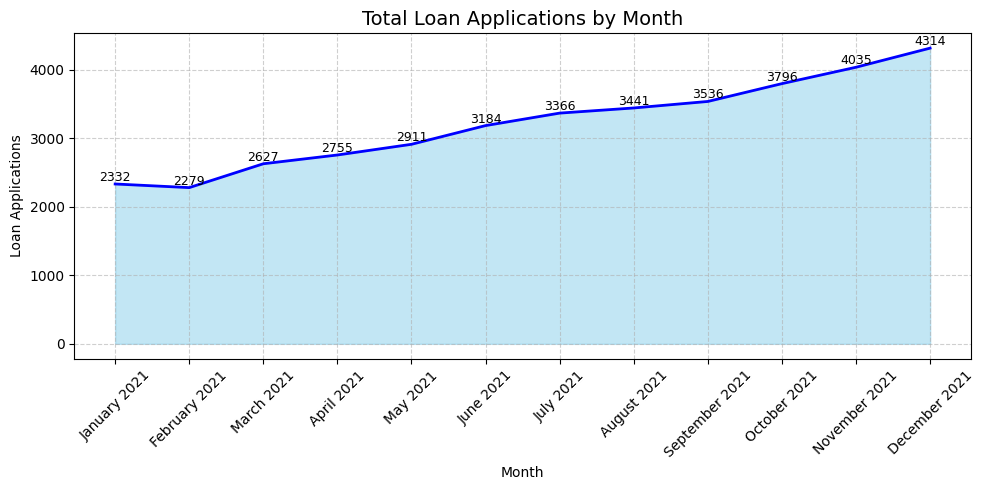

In [23]:
monthly_applications = (
    data.sort_values('issue_date')      ## sorting date by ascending order, such that months appear in chronological order
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%B %Y'))      ## Create new column month_name which contains the month and year of issue_date
    .groupby('month_name', sort=False)['id']       ## Grouping data by month_name, ensuring orginal order is maintained
    .count()      ## Finding the number of loan applications in each month group
    .reset_index(name='total_loan_applications')       ## Resetting index and renaming the aggregated column to total_loan_applications
)
## monthly_funded is now a dataframe with two columns, month_name and total_loan_applications

plt.figure(figsize=(10,5))
plt.fill_between(monthly_applications['month_name'], monthly_applications['total_loan_applications'], color='skyblue', alpha=0.5)      ## Fill area under line 
plt.plot(monthly_applications['month_name'], monthly_applications['total_loan_applications'], color='blue', linewidth=2)       ## plot line graph

for i, row in monthly_applications.iterrows():        ## Iterates over each row in monthly_applications dataframe, where i is the index and row is the values of the row
    plt.text(i, row['total_loan_applications'] + 0.1, f"{row['total_loan_applications']}",        ## Add text annotation at each point, displaying the loan application count and slightly above each data point
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')   ## ha is horizontal alignment, va is vertical alignment

plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Loan Applications')
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

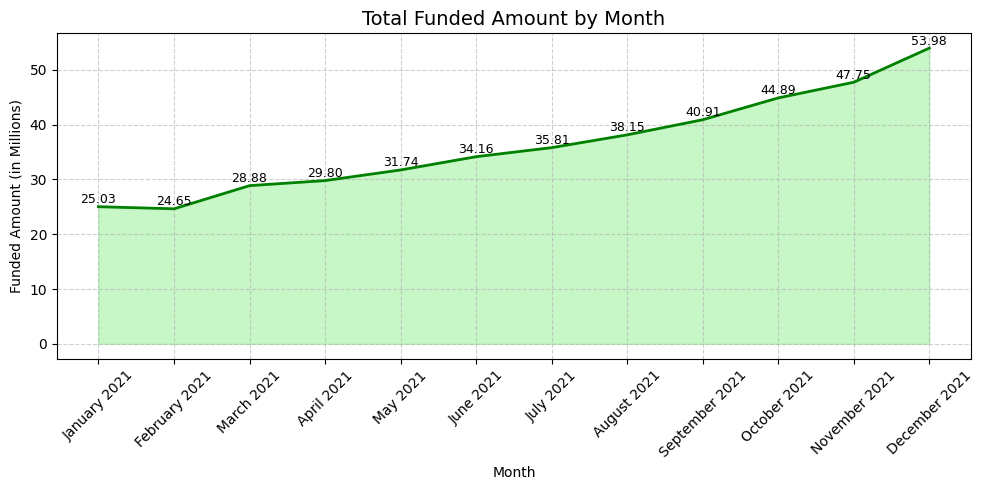

In [24]:
monthly_funded = (
    data.sort_values('issue_date')      ## sorting date by ascending order, such that months appear in chronological order
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%B %Y'))      ## Create new column month_name which contains the month and year of issue_date
    .groupby('month_name', sort=False)['loan_amount']       ## Grouping data by month_name, ensuring orginal order is maintained
    .sum()      ## Finding the sum of loan_amount in each month group
    .div(1000000)   ## Convert the loan amount to millions for better readability
    .reset_index(name='loan_amount_millions')       ## Resetting index and renaming the aggregated column to loan_amount_millions
)
## monthly_funded is now a dataframe with two columns, month_name and loan_amount_millions

plt.figure(figsize=(10,5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='lightgreen', alpha=0.5)      ## Fill area under line 
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='green', linewidth=2)       ## plot line graph

for i, row in monthly_funded.iterrows():        ## Iterates over each row in monthly_funded dataframe, where i is the index and row is the values of the row
    plt.text(i, row['loan_amount_millions'] + 0.1, f"{row['loan_amount_millions']:.2f}",        ## Add text annotation at each point, displaying the loan amount in millions with 2 decimal places and slightly above each data point
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')   ## ha is horizontal alignment, va is vertical alignment

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount (in Millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

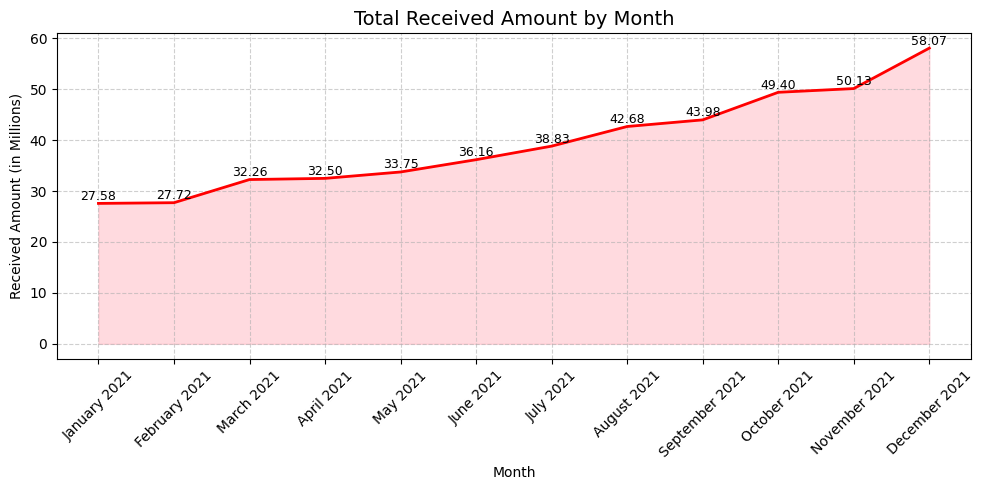

In [25]:
monthly_received = (
    data.sort_values('issue_date')      ## sorting date by ascending order, such that months appear in chronological order
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%B %Y'))      ## Create new column month_name which contains the month and year of issue_date
    .groupby('month_name', sort=False)['total_payment']       ## Grouping data by month_name, ensuring orginal order is maintained
    .sum()      ## Finding the sum of amount received in each month group
    .div(1000000)   ## Convert the amount received to millions for better readability
    .reset_index(name='amount_received_millions')       ## Resetting index and renaming the aggregated column to amount_received_millions
)
## monthly_funded is now a dataframe with two columns, month_name and amount_received_millions

plt.figure(figsize=(10,5))
plt.fill_between(monthly_received['month_name'], monthly_received['amount_received_millions'], color='lightpink', alpha=0.5)      ## Fill area under line 
plt.plot(monthly_received['month_name'], monthly_received['amount_received_millions'], color='red', linewidth=2)       ## plot line graph

for i, row in monthly_received.iterrows():        ## Iterates over each row in monthly_received dataframe, where i is the index and row is the values of the row
    plt.text(i, row['amount_received_millions'] + 0.1, f"{row['amount_received_millions']:.2f}",        ## Add text annotation at each point, displaying the amount received in millions with 2 decimal places and slightly above each data point
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')   ## ha is horizontal alignment, va is vertical alignment

plt.title('Total Received Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount (in Millions)')
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### 2. Regional Analysis by State (Total Loan Applications, Total Funded Amount, Total Amount Received)

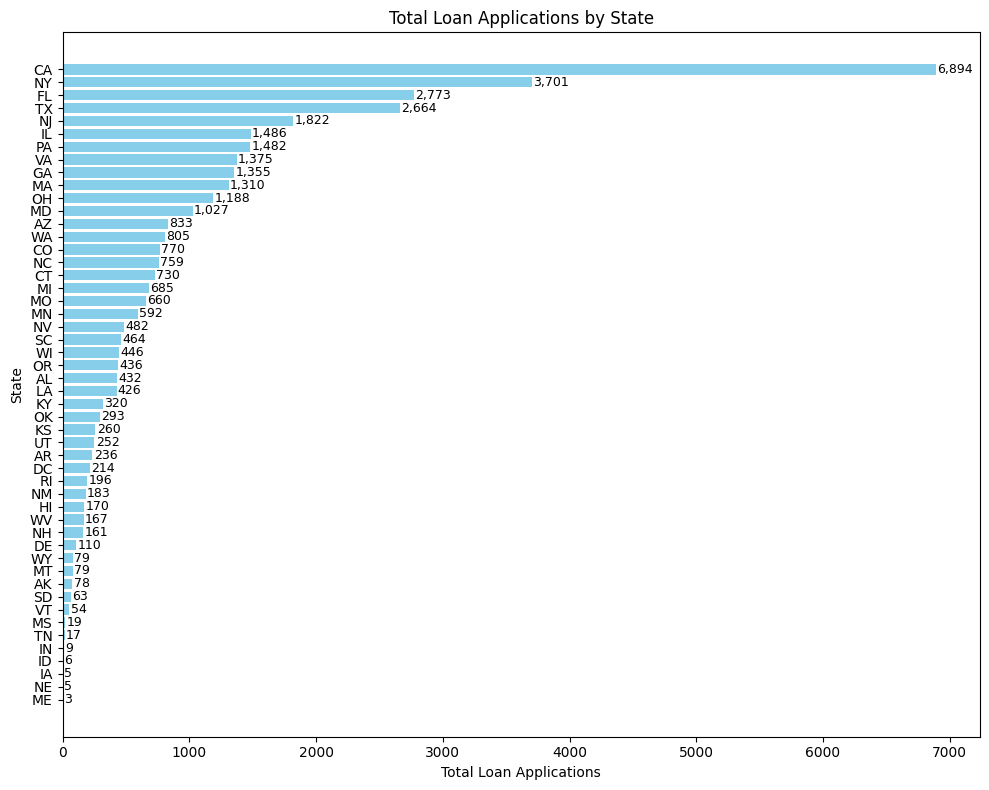

In [26]:
state_applications = data.groupby('address_state')['id'].count().sort_values(ascending=True)

plt.figure(figsize=(10,8))
bars = plt.barh(state_applications.index, state_applications.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
             f"{width:,.0f}", va='center', fontsize=9)

plt.title('Total Loan Applications by State')
plt.xlabel('Total Loan Applications')
plt.ylabel('State')
plt.tight_layout()
plt.show()

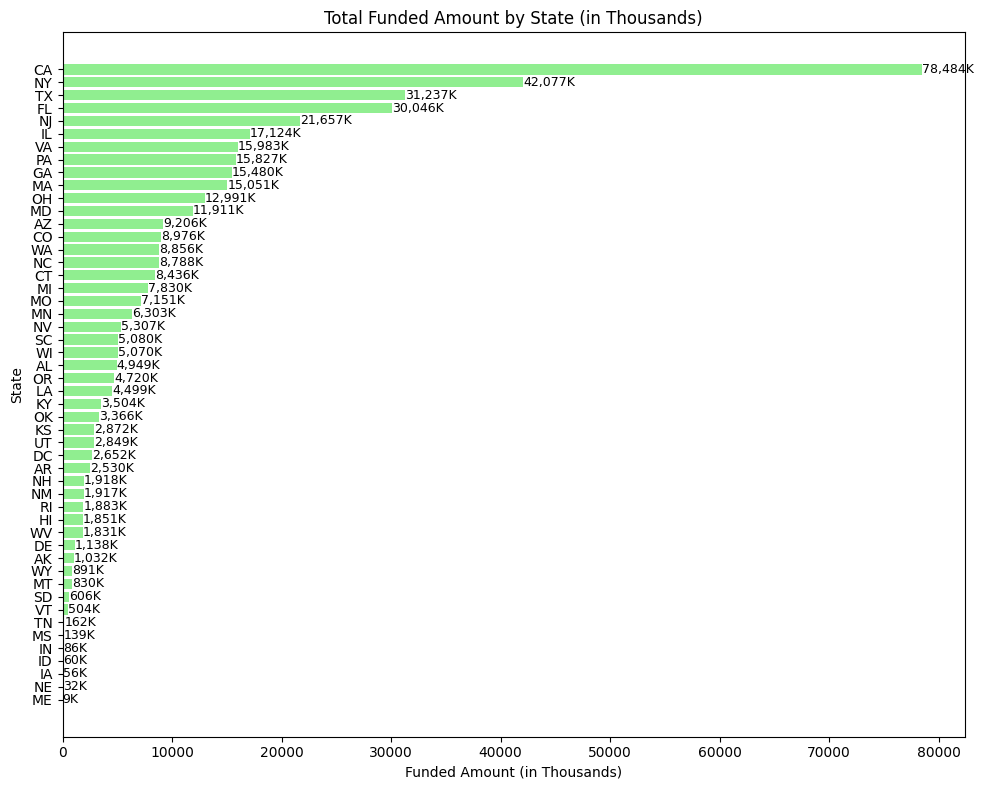

In [27]:
state_funding = data.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10,8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightgreen')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
             f"{width:,.0f}K", va='center', fontsize=9)

plt.title('Total Funded Amount by State (in Thousands)')
plt.xlabel('Funded Amount (in Thousands)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

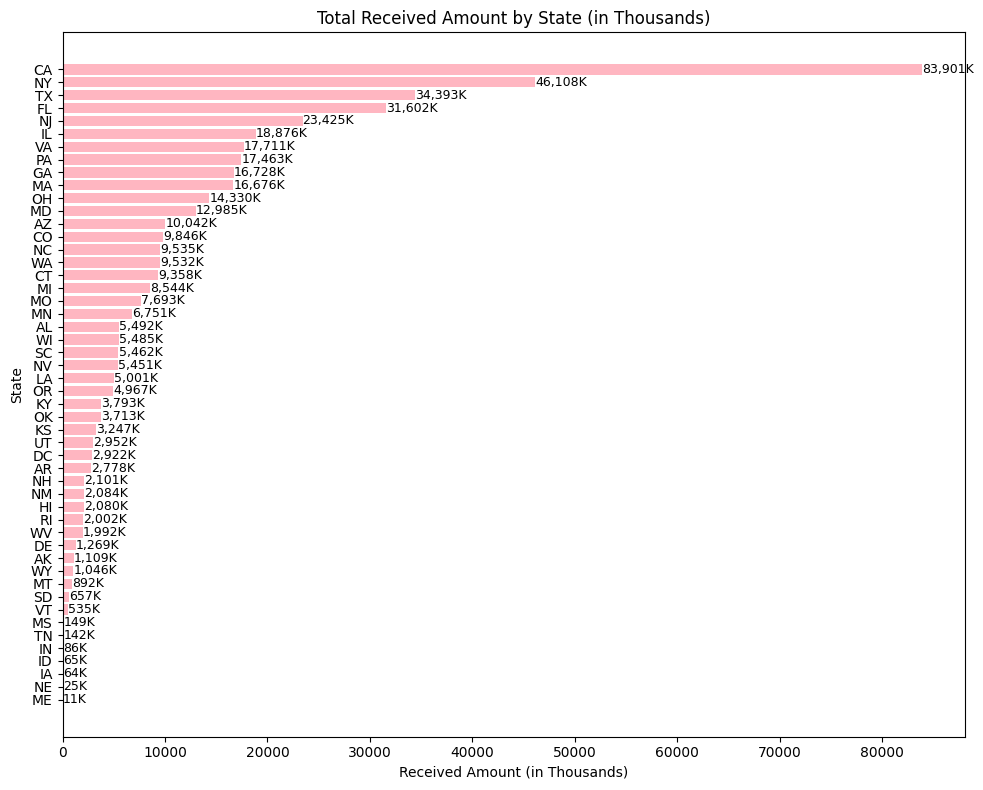

In [28]:
state_received = data.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_received_thousands = state_received/ 1000

plt.figure(figsize=(10,8))
bars = plt.barh(state_received_thousands.index, state_received_thousands.values, color='lightpink')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2,
             f"{width:,.0f}K", va='center', fontsize=9)

plt.title('Total Received Amount by State (in Thousands)')
plt.xlabel('Received Amount (in Thousands)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

#### 3. Loan Term Analysis (Total Loan Applications, Total Funded Amount, Total Amount Received)

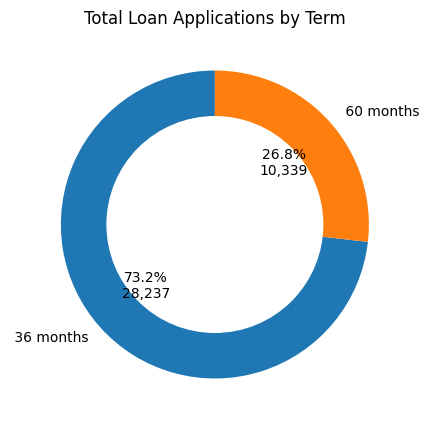

In [29]:
term_applications = data.groupby('term')['id'].count() 

plt.figure(figsize=(5,5))
plt.pie(
    term_applications,
    labels=term_applications.index,
    autopct=lambda p: f"{p:.1f}%\n{p/100*sum(term_applications):,.0f}",
    startangle=90,
    wedgeprops={'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title("Total Loan Applications by Term")
plt.show()

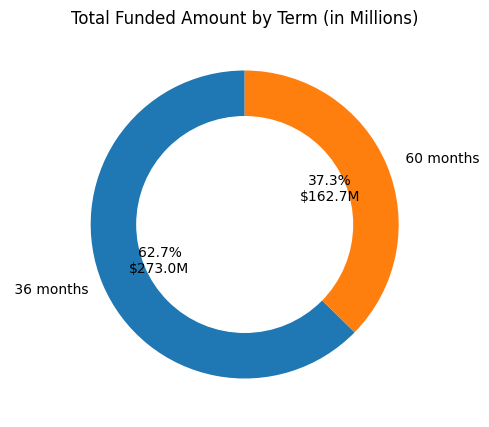

In [30]:
term_funding_millions = data.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5,5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title("Total Funded Amount by Term (in Millions)")
plt.show()

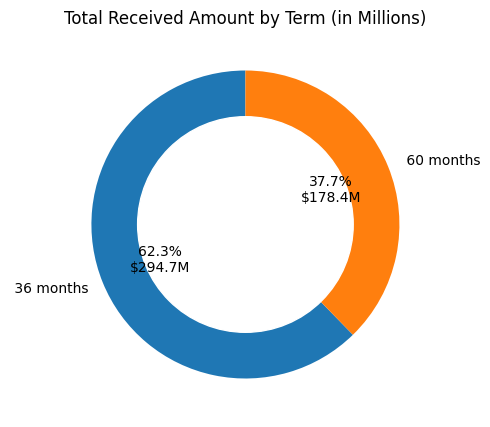

In [31]:
term_received_millions = data.groupby('term')['total_payment'].sum() / 1000000

plt.figure(figsize=(5,5))
plt.pie(
    term_received_millions,
    labels=term_received_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_received_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0,0), 0.70, color='white'))
plt.title("Total Received Amount by Term (in Millions)")
plt.show()

#### 4. Employee Length Analysis (Total Loan Applications, Total Funded Amount, Total Amount Received)

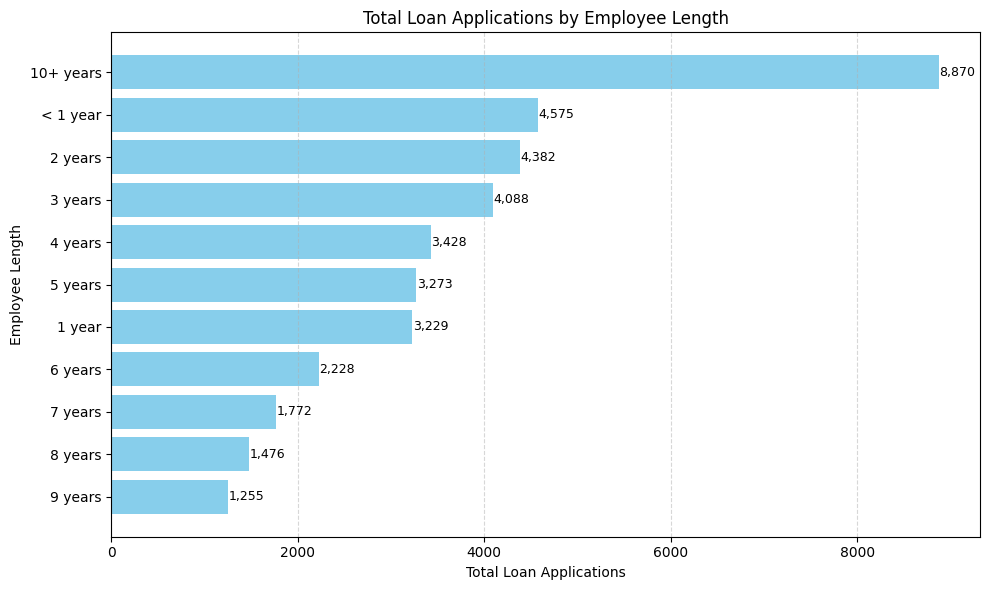

In [32]:
emp_applications = data.groupby('emp_length')['id'].count().sort_values() 

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_applications.index, emp_applications.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f"{width:,.0f}", va='center', fontsize=9)

plt.title('Total Loan Applications by Employee Length')
plt.xlabel('Total Loan Applications')
plt.ylabel('Employee Length')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

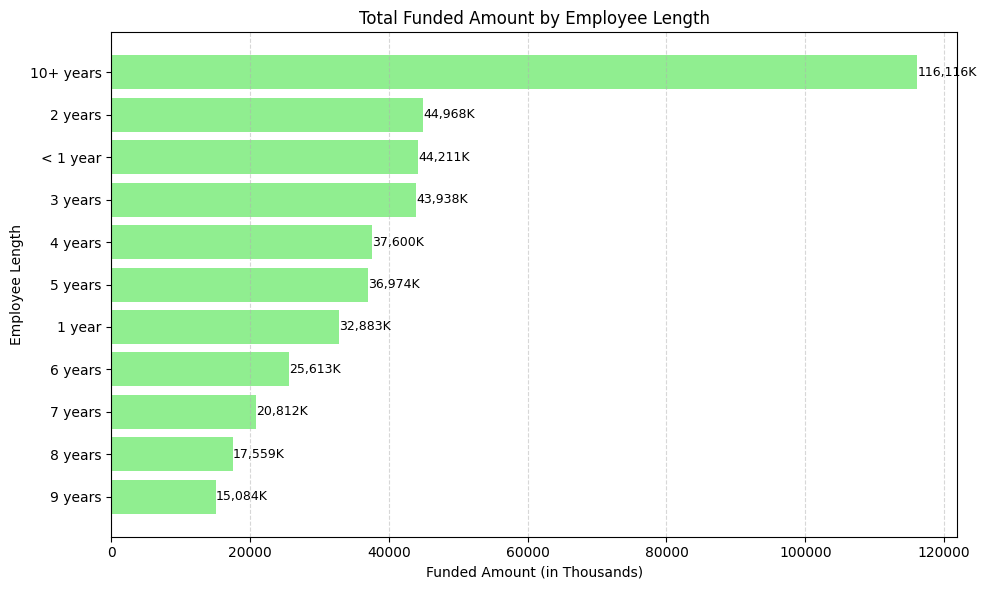

In [33]:
emp_funding = data.groupby('emp_length')['loan_amount'].sum().sort_values() / 1000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_funding.index, emp_funding.values, color='lightgreen')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f"{width:,.0f}K", va='center', fontsize=9)

plt.title('Total Funded Amount by Employee Length')
plt.xlabel('Funded Amount (in Thousands)')
plt.ylabel('Employee Length')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

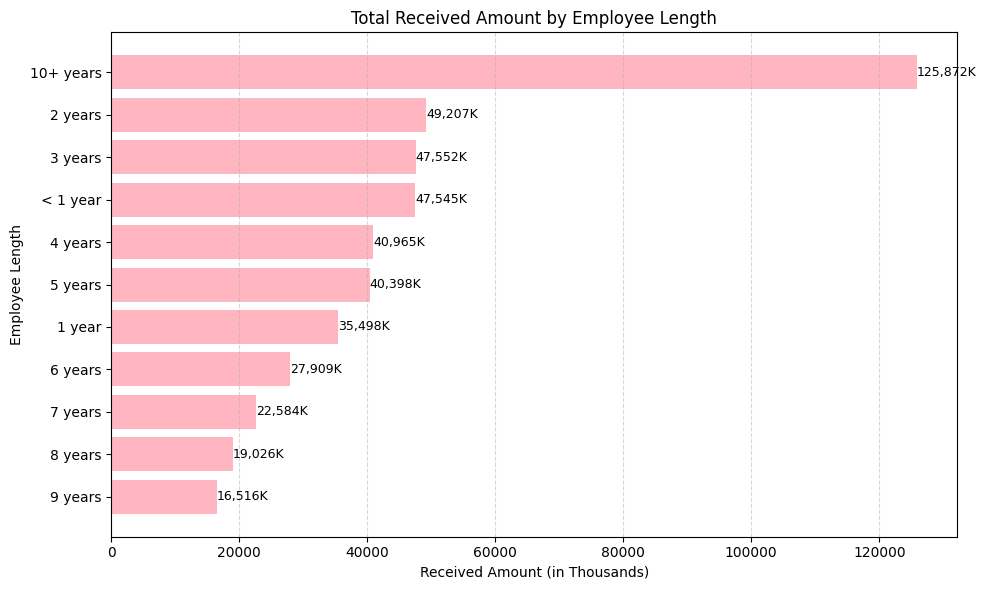

In [34]:
emp_received = data.groupby('emp_length')['total_payment'].sum().sort_values() / 1000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_received.index, emp_received.values, color='lightpink')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f"{width:,.0f}K", va='center', fontsize=9)

plt.title('Total Received Amount by Employee Length')
plt.xlabel('Received Amount (in Thousands)')
plt.ylabel('Employee Length')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 5. Loan Purpose Breakdown (Total Loan Applications, Total Funded Amount, Total Amount Received)

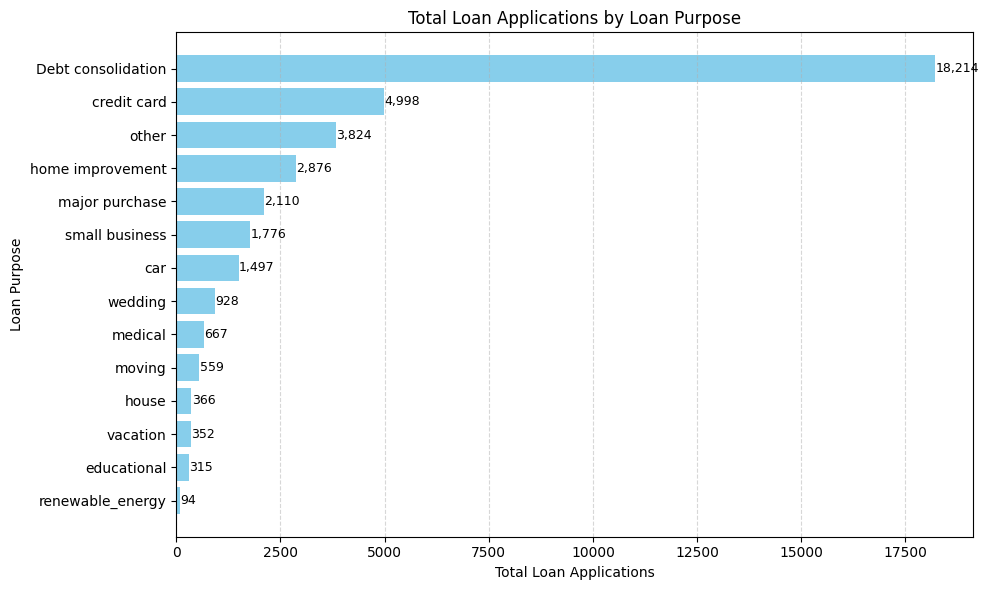

In [35]:
purpose_applications = data.groupby('purpose')['id'].count().sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_applications.index, purpose_applications.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f"{width:,.0f}", va='center', fontsize=9)

plt.title('Total Loan Applications by Loan Purpose')
plt.xlabel('Total Loan Applications')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

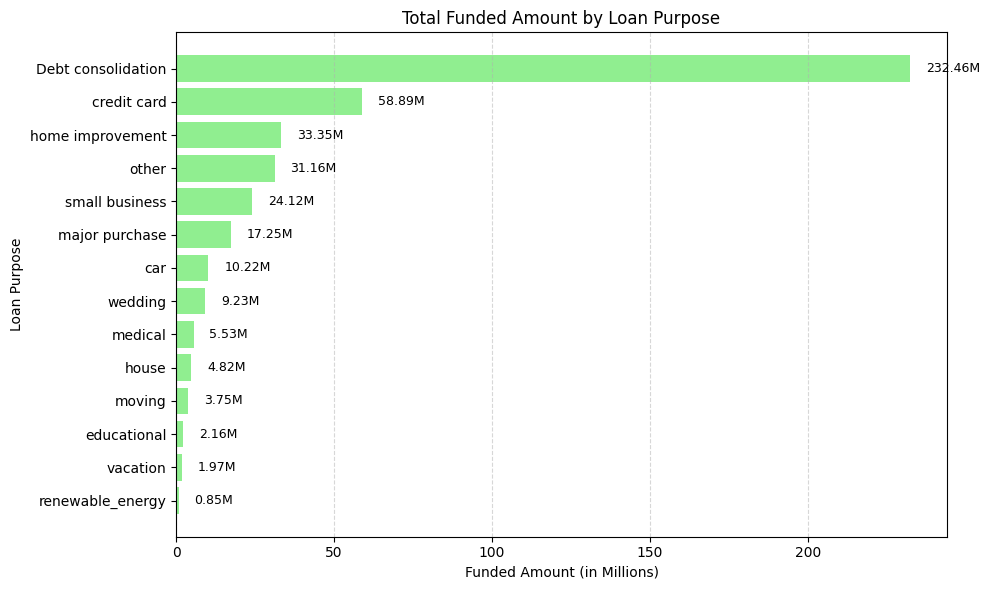

In [36]:
purpose_funding_millions = data.groupby('purpose')['loan_amount'].sum().sort_values() / 1000000

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='lightgreen')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f"{width:,.2f}M", va='center', fontsize=9)

plt.title('Total Funded Amount by Loan Purpose')
plt.xlabel('Funded Amount (in Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

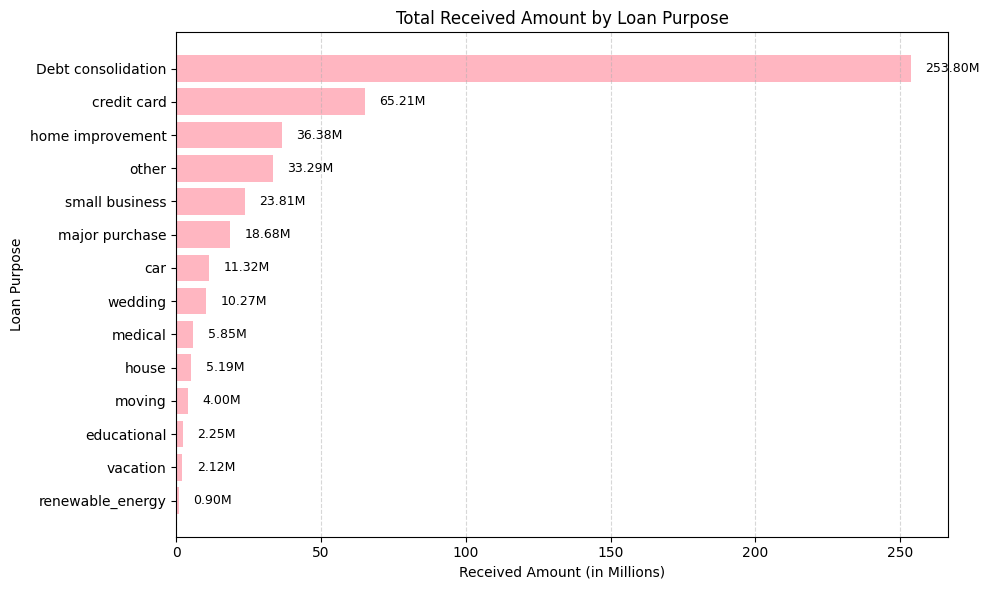

In [37]:
purpose_received_millions = data.groupby('purpose')['total_payment'].sum().sort_values() / 1000000

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_received_millions.index, purpose_received_millions.values, color='lightpink')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f"{width:,.2f}M", va='center', fontsize=9)

plt.title('Total Received Amount by Loan Purpose')
plt.xlabel('Received Amount (in Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 6. Home Ownership Analysis (Total Loan Applications, Total Funded Amount, Total Amount Received)

In [38]:
home_applications = data.groupby('home_ownership')['id'].count().reset_index()

fig = go.Figure(
    go.Treemap(
        labels=home_applications['home_ownership'],
        parents=[''] * len(home_applications),
        values=home_applications['id'],
        marker=dict(colors=home_applications['id'], colorscale='Blues'),
        textinfo='label+value',
        hovertemplate='<b>%{label}</b><br>Loan Applications: %{value:.0f}<br>Percentage of Parent: %{percentParent:.2%}<extra></extra>'
    )
)

fig.update_layout(
    title='Total Loan Applications by Home Ownership (in Millions)',
    margin=dict(t=50, l=25, r=25, b=25)
)
fig.show()

In [39]:
home_funding = data.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1000000

fig = go.Figure(
    go.Treemap(
        labels=home_funding['home_ownership'],
        parents=[''] * len(home_funding),
        values=home_funding['loan_amount_millions'],
        marker=dict(colors=home_funding['loan_amount_millions'], colorscale='Greens'),
        textinfo='label+value',
        hovertemplate='<b>%{label}</b><br>Funded Amount: $%{value:.2f}M<br>Percentage of Parent: %{percentParent:.2%}<extra></extra>'
    )
)

fig.update_layout(
    title='Total Funded Amount by Home Ownership (in Millions)',
    margin=dict(t=50, l=25, r=25, b=25)
)
fig.show()

In [40]:
home_received = data.groupby('home_ownership')['total_payment'].sum().reset_index()
home_received['total_payment_millions'] = home_received['total_payment'] / 1000000

fig = go.Figure(
    go.Treemap(
        labels=home_received['home_ownership'],
        parents=[''] * len(home_received),
        values=home_received['total_payment_millions'],
        marker=dict(colors=home_received['total_payment_millions'], colorscale='Reds'),
        textinfo='label+value',
        hovertemplate='<b>%{label}</b><br>Received Amount: $%{value:.2f}M<br>Percentage of Parent: %{percentParent:.2%}<extra></extra>'
    )
)

fig.update_layout(
    title='Total Received Amount by Home Ownership (in Millions)',
    margin=dict(t=50, l=25, r=25, b=25)
)
fig.show()